# Police Force Responses by Crime

In [1]:
#Dependencies
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from scipy.stats import linregress

In [2]:
#Import csv file
police_data = pd.read_csv("Resources/Police_Use_of_Force.csv")
police_data.head()

,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
0,-93.299256,44.980557,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,No,DISCON,NaN,1,...,322402,80434.0,2514,15824,44.980557,-93.299256,-10386025.66,5618461.049,2021/02/11 08:18:54+00,1
1,-93.273109,44.979187,19194597,08-019047,2008/01/19 23:47:58+00,On Site,No,NOSMOK,NaN,1,...,322402,46998.0,23458,17239,44.979187,-93.273109,-10383115.01,5618245.449,2021/02/11 08:18:54+00,2
2,-93.311817,45.006028,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Yes,ASLT2,NaN,1,...,322402,80434.0,9486,10909,45.006028,-93.311817,-10387423.95,5622470.553,2021/02/11 08:18:54+00,3
3,-93.288860,45.043001,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Yes,DAMPRP,NaN,2,...,322402,80434.0,3070,17338,45.043001,-93.288860,-10384868.44,5628293.683,2021/02/11 08:18:54+00,4
4,-93.271963,44.981655,19194600,08-052540,2008/02/24 02:25:39+00,Fight,No,OBSTRU,No,3,...,322402,46998.0,23458,17120,44.981655,-93.271963,-10382987.47,5618633.899,2021/02/11 08:18:54+00,5


In [3]:
#create new DataFrame
police_data_df = police_data.loc[:, ["PoliceUseOfForceID", "CaseNumber", "ResponseDate", "Problem", "ForceType",
                                    "ForceTypeAction", "EventAge", "TypeOfResistance", "Precinct", "Neighborhood"]]
police_data_df

,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,ForceType,ForceTypeAction,EventAge,TypeOfResistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...
32030,19226626,09-Cooper,2009/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Cooper
32031,19226627,08-Bottineau,2008/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Bottineau
32032,19226628,09-Loring Park,2009/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Loring Park
32033,19226629,14-Cooper,2014/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Cooper


In [4]:
#drop NaN from Dataframe
police_data_df = police_data_df.dropna(how='any')
police_data_df

,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,ForceType,ForceTypeAction,EventAge,TypeOfResistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...
30829,19225425,20-287806,2020/11/12 14:41:54+00,Domestic Abuse-In Progress,Maximal Restraint Technique,Not Side Recovery Position,19.0,Other ...,2,Waite Park
30830,19225426,20-288772,2020/11/13 21:48:02+00,Unwanted Person,Bodily Force,Body Weight Pin,29.0,Verbal Non-Compliance ...,5,Linden Hills
30831,19225427,20-292656,2020/11/19 15:44:41+00,Emotionally Disturb Person,Taser,Firing Darts,23.0,Other ...,4,Willard - Hay
30832,19225428,20-298833,2020/11/28 08:18:10+00,Motor Vehicle Chase,Bodily Force,Push Away,31.0,Fled in a Vehicle ...,3,East Phillips


In [5]:
#rename rows in ForceTypeAction column
police_data_df['ForceTypeAction'] = police_data_df['ForceTypeAction'].replace({
    "Knee": "Knees",
    "Body Weight Pin": "Body Weight to Pin",
    "Conscious Neck Restraint": "Neck Restraint: subject did not lose conciousness",
    "Punch": "Punches",
    "Slap": "Slaps",
    'Unconscious Neck Restraint': 'Neck Restraint: subject did not lose conciousness',
    'Firearm as striking tool': 'Firearms As Striking Tool'
})


C:\Users\hills\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [6]:
#rename rows in ForceType column
police_data_df['ForceType'] = police_data_df['ForceType'].replace({
    "Less Lethal Projectile": "Less Lethal"
})

C:\Users\hills\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
#rename rows in TypeOfResistance column
police_data_df['TypeOfResistance'] = police_data_df['TypeOfResistance'].replace({
    "TENSED": "Tensed",
    "tensed": "Tensed",
    "Tensed                                                                         ": "Tensed",
    "verbal non-compliance": "Verbal Non-Compliance",
    "Verbal Non-Compliance                                                          ": "Verbal Non-Compliance",
    "commission of crime":"Commission of Crime",
    "Commission of a Crime                                                          ":"Commission of Crime",
    "COMMISSION OF CRIME":"Commission of Crime",
    "Fled on Foot                                                                   ":"Fled on Foot",
    "Fled in a Vehicle                                                              ":"Fled in Vehicle",
    "Assaulted Officer                                                              ":"Assaulted Officer",
    "Assaulted Police K9                                                            ":"Assaulting Police K9",
    "Other                                                                          ":"Other"
           
})

C:\Users\hills\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [8]:
#rename columns in Dataframe
clean_df = police_data_df.rename(columns ={
    'PoliceUseOfForceID': "Police ID",
    'CaseNumber': "Case Number",
    'ResponseDate': "Response Date",
    'Problem': "Type of Crime",
    'ForceType': 'Type of Force',
    'ForceTypeAction': 'Type of Force Action',
    'EventAge': 'Event Age',
    'TypeOfResistance': 'Type of Resistance'
})
#reset the index in DataFrame
clean_df.reset_index(drop=True, inplace=True)
clean_df

,Police ID,Case Number,Response Date,Type of Crime,Type of Force,Type of Force Action,Event Age,Type of Resistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...
29070,19225425,20-287806,2020/11/12 14:41:54+00,Domestic Abuse-In Progress,Maximal Restraint Technique,Not Side Recovery Position,19.0,Other,2,Waite Park
29071,19225426,20-288772,2020/11/13 21:48:02+00,Unwanted Person,Bodily Force,Body Weight to Pin,29.0,Verbal Non-Compliance,5,Linden Hills
29072,19225427,20-292656,2020/11/19 15:44:41+00,Emotionally Disturb Person,Taser,Firing Darts,23.0,Other,4,Willard - Hay
29073,19225428,20-298833,2020/11/28 08:18:10+00,Motor Vehicle Chase,Bodily Force,Push Away,31.0,Fled in Vehicle,3,East Phillips


# 1. What incidents result the most in police use of force? (Sam)

In [9]:
test_data = clean_df["Type of Crime"].describe(include="all")
test_data

count                  29075
unique                   131
top       Suspicious Person 
freq                    4845
Name: Type of Crime, dtype: object

In [10]:
incident_data = clean_df.groupby("Type of Crime")
total_count = incident_data.nunique()["Case Number"]

incidents = pd.DataFrame({"Total Count": total_count})
top_incidents = incidents.sort_values("Total Count", ascending=False)

top_incidents.index.name = "Incidents"
top_incidents.head()

,Total Count
Incidents,
Suspicious Person,2341
Fight,1348
Disturbance,1031
Domestic Abuse-In Progress,719
Suspicious Vehicle,570


Text(0, 0.5, 'Number of Cases')

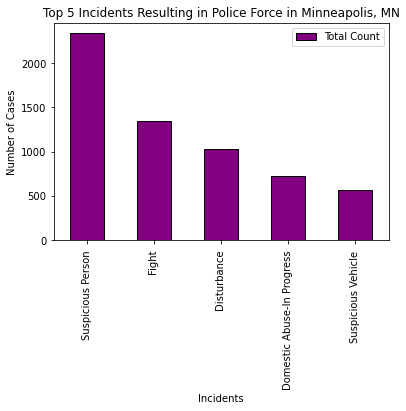

In [11]:
top_incidents.head(5)
top_incidents.head(5).plot(kind="bar", edgecolor="black", facecolor="purple",fontsize=10)
plt.title("Top 5 Incidents Resulting in Police Force in Minneapolis, MN")
plt.ylabel("Number of Cases")

In [12]:
# Sam's code end here

# 2. What type of force is used the most? (Ainash)

In [13]:
#find all types of force
force_type_ainash = clean_df['Type of Force']
force_type_ainash.unique()

array(['Bodily Force', 'Chemical Irritant', 'Taser', 'Improvised Weapon',
       'Baton', 'Police K9 Bite', 'Firearm', 'Less Lethal',
       'Gun Point Display', 'Maximal Restraint Technique'], dtype=object)

In [14]:
# find the most used types of force
force_data_ainash = clean_df[['Type of Force', 'Case Number']]
force_data_groupby_ainash = force_data_ainash.groupby('Type of Force')
force_data_count_ainash = force_data_groupby_ainash['Type of Force'].count()
most_force_type_ainash = pd.DataFrame({'Total Count': force_data_count_ainash})
sorted_ainash = most_force_type_ainash.sort_values(['Total Count'], ascending = False)

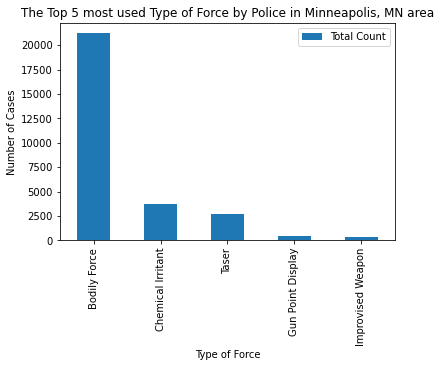

<Figure size 432x288 with 0 Axes>

In [15]:
# create a bar chart to show the Top 5 most used types of force
top5_force_bar_ainash = sorted_ainash.head().plot(kind = 'bar', title = 'The Top 5 most used Type of Force by Police in Minneapolis, MN area')
top5_force_bar_ainash.set_xlabel ('Type of Force')
top5_force_bar_ainash.set_ylabel ('Number of Cases')
plt.show()
plt.tight_layout()

In [16]:
#find all types of force action
force_type_action_ainash = clean_df['Type of Force Action']
force_type_action_ainash.nunique()

41

In [17]:
# find the most used type of force and its action
merged_force_type_data_ainash = clean_df[['Type of Force', 'Type of Force Action', 'Case Number']]
merged_force_type_data_ainash = merged_force_type_data_ainash.groupby(['Type of Force', 'Type of Force Action'])
merged_force_type = merged_force_type_data_ainash['Type of Force Action'].count()
merged_ainash = pd.DataFrame({'Total Count': merged_force_type})
sorted_merged_ainash = merged_ainash.sort_values(['Total Count'], ascending = False)

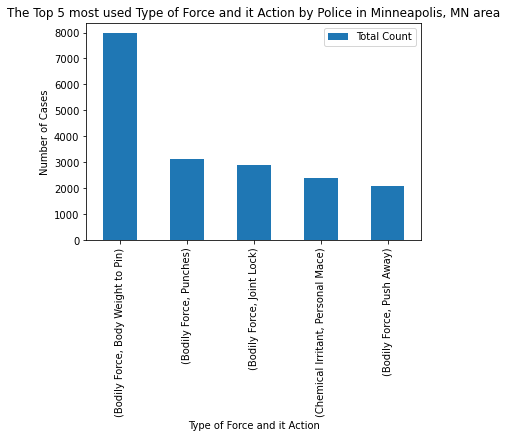

<Figure size 432x288 with 0 Axes>

In [18]:
# create a bar chart to show the Top 5 most used types of force and its action
top5_merged_bar = sorted_merged_ainash.head().plot(kind = 'bar', title = 'The Top 5 most used Type of Force and it Action by Police in Minneapolis, MN area')
top5_merged_bar.set_xlabel ('Type of Force and it Action')
top5_merged_bar.set_ylabel ('Number of Cases')
plt.show()
plt.tight_layout()

In [19]:
# drop ages =0
age_df = clean_df.loc[clean_df['Event Age'] != 0, :]

In [20]:
#create bins for ages
bins = [6,9.9,14.9,19.9,29.9,39.9,49.9,59.9,69.9,79.9,89.9]
group_names = ['6-10', '11-15', '16-20','21-30','31-40','41-50','51-60', '61-70', '71-80', '81 <']

In [21]:
age_df['Age Groups'] = pd.cut(age_df['Event Age'], bins, labels = group_names, include_lowest = True)

C:\Users\hills\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
age_data_ainash = age_df[['Age Groups', 'Case Number']]
age_data_groupby_ainash = age_data_ainash.groupby('Age Groups')
age_count_ainash = age_data_groupby_ainash['Age Groups'].count()
age_df_ainash = pd.DataFrame({'Total Count': age_count_ainash})

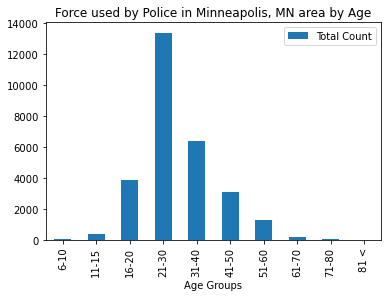

<Figure size 432x288 with 0 Axes>

In [23]:
age_bar_ainash = age_df_ainash.plot(kind = 'bar', title = 'Force used by Police in Minneapolis, MN area by Age')
top5_force_bar_ainash.set_xlabel ('Age Groups')
top5_force_bar_ainash.set_ylabel ('Number of Cases')
plt.show()
plt.tight_layout()

# Types of Force used by Police in Minneapolis,MN Analysis
## When analyzing types of Force used by Police in Minneapolis, Minnesota, we observed that:
* There are 10 types of Force that Police in Minneapolis, MN use in incidents: Bodily Force, Chemical Irritant, Taser, Improvised Weapon, Baton, Police K9 Bite, Firearm, Less Lethal Projectile, Gun Point Display, Maximal Restraint Technique. From these force types, the five most commonly used by law enforcement officers in Minneapolis are: Bodily Force (21212 cases among analyzed data), Chemical Irritant (3780 cases), Taser(2757 cases), Gun Point Display (436 cases) and Improvised weapon (343 cases).
* Types of Force also have sub-categories that are called Types of Force Action. Our data includes 41 types of Force Action. The Top 5 most used Types of Force Action by Police in Minneapolis, MN area are Body Weight to Pin (Bodily Force type), Punches (Bodily Force type), Joint Lock (Bodily Force type), Personal Mace (Chemical Irritant type) and Push Away (Bodily Force type).
* We also decided to analyze the police cases by Age Groups. After analysis of Force Police used by Age Groups, we observed that most commonly, the most force is used on people between age 21-30. 

In [24]:
# Ainash code ends here

# 3. Which is the most popular type of resistance? (Humera)

# Most popular type of Resistance

In [25]:
# find the most used force type
force_type_data_ainash = clean_df[['Type of Force', 'Case Number']]
force_type_data_ainash = force_type_data_ainash.groupby('Type of Force')
force_type = force_type_data_ainash['Type of Force'].count()
force_type_data = pd.DataFrame({'Total Count': force_type})
sorted_force = force_type_data.sort_values(['Total Count'], ascending = False)



In [26]:
incident_data = clean_df.groupby("Type of Crime")
total_count = incident_data.nunique()["CaseNumber"]
# create a bar chart to show the most used force type
force_bar = sorted_force.plot(kind = 'bar', title = 'Used Type of Force by Police in Minneapolis, MN area')
force_bar.set_xlabel ('Type of Force')
force_bar.set_ylabel ('Number of Cases')
plt.show()
plt.tight_layout()resistance_data = clean_df.groupby("TypeOfResistance")
total_count = resistance_data.nunique()["CaseNumber"]

resistance = pd.DataFrame({"Total Count": total_count})
resistance_case_no = resistance.sort_values("Total Count", ascending=False)

resistance_case_no.index.name = "TypeOfResistance"
resistance_case_no.head()

SyntaxError: invalid syntax (<ipython-input-26-a75780bc5af6>, line 8)

In [27]:
resistance_case_no.head(6).plot(kind="bar",edgecolor="black", figsize=(8, 8),facecolor="blue", fontsize=10)
plt.title("Type of Resistance Resulting in Use of Police Force in Minneapolis")
plt.ylabel("Number of Cases", fontsize=12)
plt.xlabel("Type of Resistance", fontsize=12)
plt.tight_layout()
plt.show()

NameError: name 'resistance_case_no' is not defined

In [28]:
#Pie chart
colors = ['gold', 'red', 'pink', 'blue', 'lightskyblue']
explode = (0.1, 0, 0, 0, 0)
resistance_case_no.head(5).plot(kind="pie",explode=explode, colors=colors, autopct= "%1.1f%%", subplots="False", shadow=True, startangle=150 )
plt.title('Top 5 - Type of Resistance Resulting in Use of Police Force in Minneapolis', fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()

NameError: name 'resistance_case_no' is not defined

# Force Type of Action used by Police Force in Minneapolis

In [29]:
popular_data = clean_df["ForceTypeAction"].describe(include= "all")
popular_data

KeyError: 'ForceTypeAction'

In [30]:
forcetype_data = clean_df.groupby("ForceTypeAction")
total_count = forcetype_data.nunique()["CaseNumber"]

forcetype = pd.DataFrame({"Total Count": total_count})
forcetype_case_no = forcetype.sort_values("Total Count", ascending=False)

forcetype_case_no.index.name = "ForceTypeAction"
forcetype_case_no.head()

KeyError: 'ForceTypeAction'

In [31]:
forcetype_case_no.head(5)
forcetype_case_no.head(10).plot(kind="barh",edgecolor="black", facecolor="red", fontsize=12, align="center", alpha=1.0)
plt.title("ForceTypeAction Resulting in Use of Police Force in Minneapolis")
plt.ylabel("Number of Cases", fontsize=12)
plt.xlabel("Force Type Action", fontsize=12)
plt.show()

NameError: name 'forcetype_case_no' is not defined

In [32]:
clean_df

,Police ID,Case Number,Response Date,Type of Crime,Type of Force,Type of Force Action,Event Age,Type of Resistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...
29070,19225425,20-287806,2020/11/12 14:41:54+00,Domestic Abuse-In Progress,Maximal Restraint Technique,Not Side Recovery Position,19.0,Other,2,Waite Park
29071,19225426,20-288772,2020/11/13 21:48:02+00,Unwanted Person,Bodily Force,Body Weight to Pin,29.0,Verbal Non-Compliance,5,Linden Hills
29072,19225427,20-292656,2020/11/19 15:44:41+00,Emotionally Disturb Person,Taser,Firing Darts,23.0,Other,4,Willard - Hay
29073,19225428,20-298833,2020/11/28 08:18:10+00,Motor Vehicle Chase,Bodily Force,Push Away,31.0,Fled in Vehicle,3,East Phillips


# Groupby Forcetype and Type of Resistance

In [33]:
#Top 5 - Force Type and Force Type Action Vs Number of Cases
ft_fa = clean_df.groupby(['ForceType','ForceTypeAction'])
ft_fa.count().head(5)

KeyError: 'ForceType'

In [34]:
#Top 5 - Force Type and Force Type Action Vs Number of Cases
ft_fa= clean_df.groupby(['ForceType','ForceTypeAction'])
total_count = ft_fa.nunique()["CaseNumber"]
forcetype_forceaction = pd.DataFrame({"Total Count": total_count})
forcetype_forceaction = forcetype_forceaction.sort_values("Total Count", ascending=False)
#forcetype_forceaction.index.name = "ForceTypeAction"
forcetype_forceaction.head()

KeyError: 'ForceType'

In [35]:
#Top 5 - Force Type and Force Type Action Vs Number of Cases
forcetype_forceaction.head(8).plot(kind="barh",edgecolor="black", facecolor="purple", fontsize=12, align="center", alpha=1.0)
plt.title("Force Type and Force Type Action Vs Number of Cases")
plt.ylabel("Force Type Action_Force Type", fontsize=12)
plt.xlabel("Number of Cases", fontsize=12)
plt.show()

NameError: name 'forcetype_forceaction' is not defined

In [36]:
#Top 5 - Force Type and Type of Resistance Vs Number of Cases
ft_tr = clean_df.groupby(['ForceType','TypeOfResistance'])
ft_tr.count().head(5)

KeyError: 'ForceType'

In [37]:
# Top 5 - Force Type and Type of Resistance Vs Number of Cases
ft_tr= clean_df.groupby(['ForceType','TypeOfResistance'])
total_count = ft_tr.nunique()["CaseNumber"]
forcetype_resistance = pd.DataFrame({"Total Count": total_count})
forcetype_resistance = forcetype_resistance.sort_values("Total Count", ascending=False)
forcetype_resistance.head()

KeyError: 'ForceType'

In [38]:
# Top 5 - Force Type and Type of Resistance Vs Number of Cases
forcetype_resistance.head(8).plot(kind="barh",edgecolor="black", facecolor="orange", fontsize=12, align="center", alpha=1.0)
plt.title("Force Type and Type of Resistance Vs Number of Cases")
plt.ylabel("Force Type_ Resistance", fontsize=12)
plt.xlabel("Number of Cases", fontsize=12)
plt.show()

NameError: name 'forcetype_resistance' is not defined

In [39]:
#problem and force type

In [40]:
#Problem and Type of Resistance

In [41]:
# Problem and force type

In [42]:
# Humera code end here

# 4. Which neighborhood in Minneapolis see’s the highest frequency of police force? (Mike Hills)

In [43]:
#pull out neighborhood and forcetype from clean df
#group by neighborhood and calculate the total force count per neighborhood
force_per_neighborhood_df = clean_df.loc[:,['Neighborhood','Type of Force']]
force_group = force_per_neighborhood_df.groupby('Neighborhood')
sum_neigh = force_group['Type of Force'].count()

#place results into new df, sort by force count from highest to lowest; store and display
force_per_neighborhood_df = pd.DataFrame({'Force Count': sum_neigh})
sorted_force_df = force_per_neighborhood_df.sort_values(['Force Count'], ascending=False)
sorted_force_df

,Force Count
Neighborhood,
Downtown West,7535
Jordan,1429
Near - North,1294
Hawthorne,1288
Willard - Hay,987
...,...
Hale,22
Page,14
Camden Industrial,13


In [44]:
#store top 5 highest total force per neighborhood into its own df and display
top5force_df = sorted_force_df.head(5)
top5force_df

,Force Count
Neighborhood,
Downtown West,7535
Jordan,1429
Near - North,1294
Hawthorne,1288
Willard - Hay,987


Text(0.5, 1.0, 'Minneapolis Police Use of Force Distribution per Neighborhood: 10 Highest\n(2008-2021)')

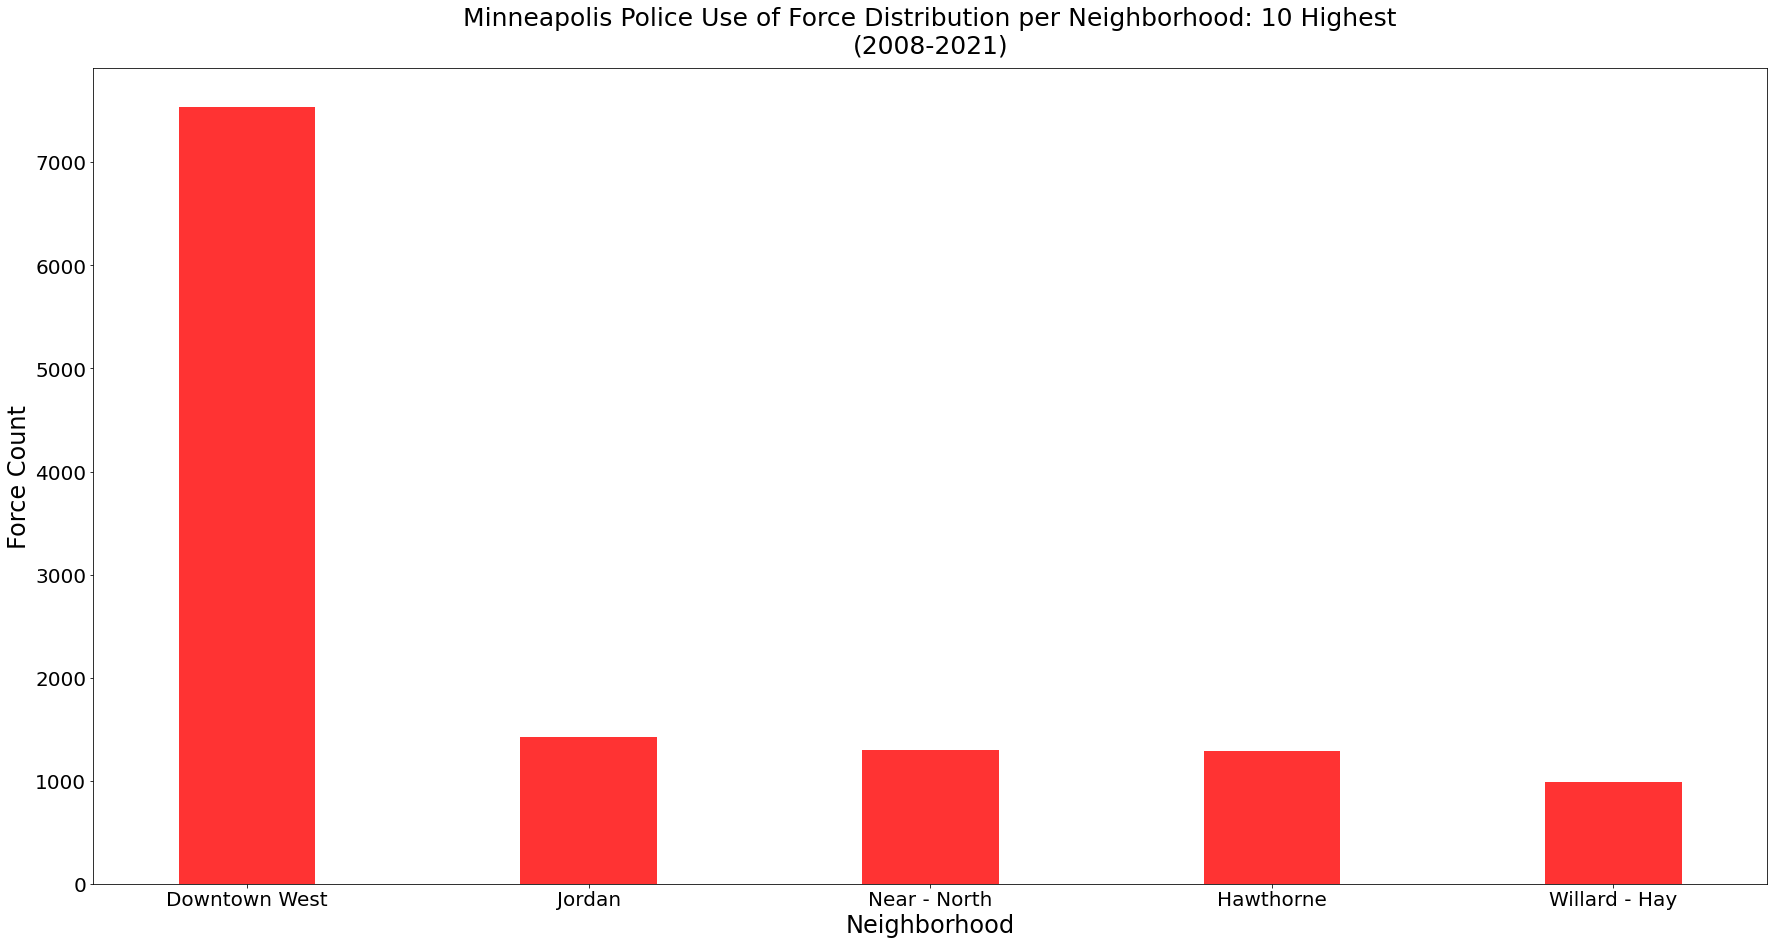

In [45]:
Top5bar = top5force_df.plot(kind="bar", figsize=(30,15), width=.4, color="red", alpha=.8, rot=0, fontsize=20, legend=False)
Top5bar.set_ylabel('Force Count',fontdict={'fontsize':24})
Top5bar.set_xlabel('Neighborhood',fontdict={'fontsize':24})
Top5bar.set_title('Minneapolis Police Use of Force Distribution per Neighborhood: 10 Highest' + '\n' + '(2008-2021)', pad=15,fontdict={'fontsize':25})

In [46]:
#Find highest force count neighborhood and store
worst_neigh = sorted_force_df.index[0]

#find and store highest force count
top1force = top5force_df['Force Count'][0]

#remove highest force count row and store into new df
top1_clean_df = force_per_neighborhood_df.loc[force_per_neighborhood_df['Force Count'] < top1force]

#calculate total force count for all neighborhoods combined except for the highest force neighborhood
sumforce = top1_clean_df['Force Count'].sum()

In [47]:

#create dictionary to store values for summarized df
dict = {'Minneapolis Neighborhoods (Total:86)':[worst_neigh, "All Others"], 
        'Force Count': [top1force, sumforce]}

#pass dict into pd.DataFrame to generate df
Topvsrest_df = pd.DataFrame(dict)

#set index to "Minneapolis Neighborhoods" and display
Topvsrest_df = Topvsrest_df.set_index('Minneapolis Neighborhoods (Total:86)')


Text(0.5, 1.0, 'Minneapolis Police Use of Force\n(2008-2021)')

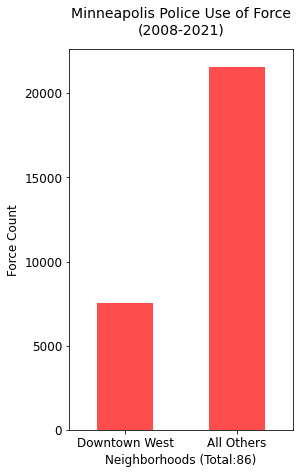

In [48]:
Topvsrest_bar = Topvsrest_df.plot(kind="bar", figsize=(4,7), width=.5, color="red", alpha=.7, rot=0, fontsize=12, legend=False)
Topvsrest_bar.set_ylabel('Force Count',fontdict={'fontsize':12})
Topvsrest_bar.set_xlabel('Neighborhoods (Total:86)',fontdict={'fontsize':12})
Topvsrest_bar.set_title('Minneapolis Police Use of Force' + '\n' + '(2008-2021)', pad=15,fontdict={'fontsize':14})

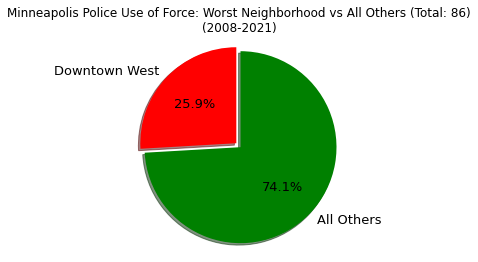

In [49]:
x = [top1force,sumforce]
explode = (.06,0)
textprops = {"fontsize":13}
colors = ["red","green"]
labels = ['Downtown West','All Others']

plt.pie(x, labels=labels, textprops=textprops, explode=explode, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Minneapolis Police Use of Force: Worst Neighborhood vs All Others (Total: 86)" + "\n" + "(2008-2021)")

plt.show()


In [50]:

clean_df.head()

,Police ID,Case Number,Response Date,Type of Crime,Type of Force,Type of Force Action,Event Age,Type of Resistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West


In [51]:
# Mike H code ends here

# 5. Is the use of police force in Minneapolis going up or down? (Mike F)

In [52]:
# Mike F code ends here

# 6. Perform a linear regression on use of force between 2015 and 2019 and make a prediction about use of force in 2020 for the city of Minneapolis.  Compare this prediction to actual use of force outcomes in 2020.

In [143]:
#pull out Response Date and Type of Force from clean df and store
date_force_df = clean_df.loc[:,['Response Date','Type of Force']]

#find all response dates containing 2015 - 2019 and store
searchfor = ['2015', '2016', '2017', '2018', '2019']
df_2015_2019 = date_force_df[date_force_df['Response Date'].str.contains('|'.join(searchfor))]

#divide 2015 - 2019 in separate dfs
df_2015 = date_force_df[date_force_df['Response Date'].str.contains("2015")]
df_2016 = date_force_df[date_force_df['Response Date'].str.contains("2016")]
df_2017 = date_force_df[date_force_df['Response Date'].str.contains("2017")]
df_2018 = date_force_df[date_force_df['Response Date'].str.contains("2018")]
df_2019 = date_force_df[date_force_df['Response Date'].str.contains("2019")]
df_2020 = date_force_df[date_force_df['Response Date'].str.contains("2020")]

date_force_df

,Response Date,Type of Force
0,2008/01/08 14:20:21+00,Bodily Force
1,2008/01/19 23:47:58+00,Bodily Force
2,2008/02/04 21:21:49+00,Bodily Force
3,2008/02/14 22:03:15+00,Bodily Force
4,2008/02/24 02:25:39+00,Bodily Force
...,...,...
29070,2020/11/12 14:41:54+00,Maximal Restraint Technique
29071,2020/11/13 21:48:02+00,Bodily Force
29072,2020/11/19 15:44:41+00,Taser
29073,2020/11/28 08:18:10+00,Bodily Force


In [141]:
#checking to make sure the length of 2015 - 2019 dfs is equal to length of 2015-2019 dfs to ensure no missing values
len(df_2015_2019) == len(df_2015) + len(df_2016) + len(df_2017) + len(df_2018) + len(df_2019)

True

In [147]:
#find and store total bodily force incidents for each year
sum2015 = df_2015['Type of Force'].count()
sum2016 = df_2016['Type of Force'].count()
sum2017 = df_2017['Type of Force'].count()
sum2018 = df_2018['Type of Force'].count()
sum2019 = df_2019['Type of Force'].count()
sum2020 = df_2020['Type of Force'].count()

In [148]:
#create dictionary of total bodily force incidents for each year
dict = {'Year':[2015,2016,2017,2018,2019,2020], 
        'Total Bodily Force Incidents': [sum2015,sum2016,sum2017,sum2018,sum2019,sum2020]}

#pass dict into pd.DataFrame to generate df
tot_bodyforce_df = pd.DataFrame(dict)
tot_bodyforce_df

,Year,Total Bodily Force Incidents
0,2015,2038
1,2016,2202
2,2017,1924
3,2018,1776
4,2019,1697
5,2020,1718


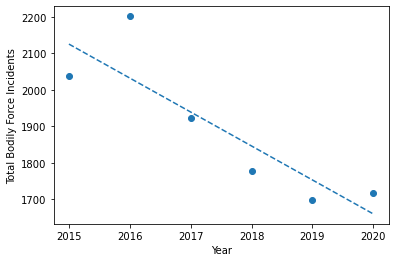

In [56]:
#find and store years for x-values
year = tot_bodyforce_df.iloc[:,0]

#find and store total bodily force incidents per year and store for y-values
tot_bodyforce = tot_bodyforce_df.iloc[:,1]

plt.xlabel('Year')
plt.ylabel('Total Bodily Force Incidents')

bf_slope, bf_int, bf_r, bf_p, bf_std_err = stats.linregress(year, tot_bodyforce)

bf_fit = bf_slope * year + bf_int
plt.scatter(year, tot_bodyforce)
plt.plot(year,bf_fit,"--")
plt.show()

In [139]:
totbodyforce2020 = tot_bodyforce_df.iloc[5,1]
print(f"The total bodily force incidents in 2020 will be {round(bf_slope * year2020 + bf_int,0)}")
print(f"The actual total bodily force incidents in 2020 were {totbodyforce2020}")


The total bodily force incidents in 2020 will be 1659.0
The actual total bodily force incidents in 2020 were 1718


In [78]:
force_counts_2015 = df_2015['Type of Force'].value_counts()
force_counts_2016 = df_2016['Type of Force'].value_counts()
force_counts_2017 = df_2017['Type of Force'].value_counts()
force_counts_2018 = df_2018['Type of Force'].value_counts()
force_counts_2019 = df_2019['Type of Force'].value_counts()
force_counts_2020 = df_2020['Type of Force'].value_counts()

bodilyforce2020 = force_counts_2020.loc['Bodily Force']
bodilyforce2019 = force_counts_2019.loc['Bodily Force']
bodilyforce2018 = force_counts_2018.loc['Bodily Force']
bodilyforce2017 = force_counts_2017.loc['Bodily Force']
bodilyforce2016 = force_counts_2016.loc['Bodily Force']
bodilyforce2015 = force_counts_2015.loc['Bodily Force']

dict = {'year':[2015,2016,2017,2018,2019,2020], 
        'Bodily Force Count': [bodilyforce2015,bodilyforce2016,bodilyforce2017,bodilyforce2018,bodilyforce2019,bodilyforce2020]}

#pass dict into pd.DataFrame to generate df
bodyforce_df = pd.DataFrame(dict)
bodyforce_count = bodyforce_df['Bodily Force Count']

startyear = bodyforce_df['year'].min()
endyear = bodyforce_df['year'].max()

bodyforce_df

tot_body = bodyforce_df.iloc[:,1]

b_slope, b_int, b_r, b_p, b_std_err = stats.linregress(year, tot_body)

b_fit = b_slope * year + b_int

bodyforce2020 = bodyforce_df.iloc[5,1]

0    1462
1    1459
2    1344
3    1398
4    1409
5    1448
Name: Bodily Force Count, dtype: int64

In [79]:
taser2020 = force_counts_2020.loc['Taser']
taser2019 = force_counts_2019.loc['Taser']
taser2018 = force_counts_2018.loc['Taser']
taser2017 = force_counts_2017.loc['Taser']
taser2016 = force_counts_2016.loc['Taser']
taser2015 = force_counts_2015.loc['Taser']

dict = {'year':[2015,2016,2017,2018,2019,2020], 
        'Taser Count': [taser2015,taser2016,taser2017,taser2018,taser2019,taser2020]}

#pass dict into pd.DataFrame to generate df
taser_df = pd.DataFrame(dict)
taser_count = taser_df['Taser Count']

tot_taser = taser_df.iloc[:,1]

t_slope, t_int, t_r, t_p, t_std_err = stats.linregress(year, tot_taser)

t_fit = t_slope * year + t_int

taser2020 = taser_df.iloc[5,1]

In [80]:
chem2020 = force_counts_2020.loc['Chemical Irritant']
chem2019 = force_counts_2019.loc['Chemical Irritant']
chem2018 = force_counts_2018.loc['Chemical Irritant']
chem2017 = force_counts_2017.loc['Chemical Irritant']
chem2016 = force_counts_2016.loc['Chemical Irritant']
chem2015 = force_counts_2015.loc['Chemical Irritant']

dict = {'year':[2015,2016,2017,2018,2019,2020], 
        'Chemical Irritant Count': [chem2015,chem2016,chem2017,chem2018,chem2019,chem2020]}

#pass dict into pd.DataFrame to generate df
chem_df = pd.DataFrame(dict)
chem_count = chem_df['Chemical Irritant Count']

tot_chem = chem_df.iloc[:,1]

c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(year, tot_chem)

c_fit = c_slope * year + c_int

chem2020 = chem_df.iloc[5,1]

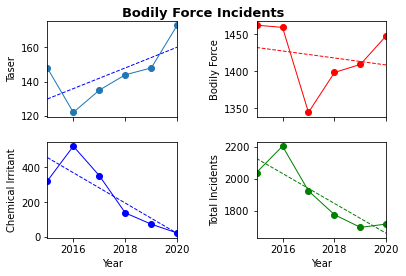

In [134]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(sharex=True, nrows=2, ncols=2, gridspec_kw={'width_ratios': [3, 3]})
fig.suptitle("Bodily Force Incidents", fontsize=13, fontweight="bold")


ax1.set_xlim(startyear, endyear)
ax1.plot(year, taser_count, linewidth=1, marker="o")
ax1.plot(year, t_fit, "b--", linewidth=1)
ax1.set_ylabel("Taser")

ax2.plot(year, bodyforce_df['Bodily Force Count'], linewidth=1, marker="o", color="r")
ax2.plot(year, b_fit, "r--", linewidth=1)
ax2.set_ylabel("Bodily Force")

ax3.plot(year, chem_count, linewidth=1, marker="o", color="b")
ax3.plot(year, c_fit, "b--", linewidth=1)
ax3.set_ylabel("Chemical Irritant")
ax3.set_xlabel("Year")

ax4.plot(year, tot_bodyforce_df['Total Bodily Force Incidents'] , linewidth=1, marker="o", color="g")
ax4.plot(year, bf_fit, "g--", linewidth=1)
ax4.set_ylabel("Total Incidents")
ax4.set_xlabel("Year")

plt.tight_layout(pad=2)

plt.show()

In [137]:
year2020 = 2020

print(f"The total taser incidents in 2020 will be {round(t_slope * year2020 + t_int,0)}")
print(f"The actual total taser incidents in 2020 were {taser2020}\n")

print(f"The total bodily force incidents in 2020 will be {round(b_slope * year2020 + b_int,0)}")
print(f"The actual total bodily force incidents in 2020 were {bodyforce2020}\n")

print(f"The total chemical irritant incidents in 2020 will be {round(c_slope * year2020 + c_int,0)}")
print(f"The actual force incidents in 2020 were {chem2020}\n")

print(f"The total force incidents in 2020 will be {round(bf_slope * year2020 + bf_int,0)}")
print(f"The actual total force incidents in 2020 were {totbodyforce2020}")


The total taser incidents in 2020 will be 160.0
The actual total taser incidents in 2020 were 173

The total bodily force incidents in 2020 will be 1408.0
The actual total bodily force incidents in 2020 were 1448

The total chemical irritant incidents in 2020 will be 19.0
The actual force incidents in 2020 were 21

The total force incidents in 2020 will be 1659.0
The actual total force incidents in 2020 were 1718
